# 2018 - 2024 NCAU PDF Extraction
This notebook is part of the workflow of creating NCAU dataset based on the Summary Report Data, covering 2004 – 2024.

## Table extraction using PyPDF2 library

In [84]:
import PyPDF2
import os

In [85]:
def find_landscape(reader):
    start_page = None
    end_page = None

    for i, page in enumerate(reader.pages):
        width = page.mediabox.width
        height = page.mediabox.height

        if width > height:  # Landscape orientation
            if start_page is None:
                start_page = i  # Set the start page when the first landscape page is found
            end_page = i  # Update the end page as long as landscape pages are found
        elif start_page is not None:
            # Break the loop if we encounter a non-landscape page after finding the start page
            break

    if start_page is not None and end_page is not None:
        return start_page, end_page + 1  # Return the range as 1-based index
    return None  # No landscape pages found


In [86]:
def select_page_range(input_pdf_path, output_directory):
    # Open the input PDF file
    with open(input_pdf_path, 'rb') as input_pdf_file:
        reader = PyPDF2.PdfReader(input_pdf_file)
        writer = PyPDF2.PdfWriter()
        
        start_page, end_page = find_landscape(reader)

        # Iterate over the selected page range (1-based index)
        for page_num in range(start_page, end_page): 
            writer.add_page(reader.pages[page_num])

        # Construct the output file path
        output_pdf_path = os.path.join(output_directory, os.path.basename(input_pdf_path).replace('.pdf', '_landscape.pdf'))

        # Write the selected pages to the output PDF file
        with open(output_pdf_path, 'wb') as output_pdf_file:
            writer.write(output_pdf_file)


In [87]:
input_dir = 'Data/pdf_summary/2018-2024'

output_dir = 'Data/pdf_summary/2018-2024_landscape'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for filename in os.listdir(dir):
        if filename.lower().endswith(".pdf"):
            input_pdf_path = os.path.join(dir, filename)

            select_page_range(input_pdf_path, output_dir)
            print(f'Processed {filename}')


Processed quarterly-data-summary-2023-Q4.pdf
Processed quarterly-data-summary-2019-Q4.pdf
Processed quarterly-data-summary-2021-Q4.pdf
Processed quarterly-data-summary-2024-Q4.pdf
Processed quarterly-data-summary-2018-Q4.pdf
Processed quarterly-data-summary-2022-Q4.pdf
Processed quarterly-data-summary-2020-Q4.pdf


## Table extraction using deep learning gmft library 

In [145]:
from gmft.pdf_bindings import PyPDFium2Document
from gmft.auto import CroppedTable, AutoTableDetector, RotatedCroppedTable

detector = AutoTableDetector()

def ingest_pdf(pdf_path) -> list[CroppedTable]:
    doc = PyPDFium2Document(pdf_path)

    tables = []
    for page in doc:
        tables += detector.extract(page)
    return tables, doc


In [148]:
tables, doc = ingest_pdf('Data/pdf_summary/2015-2017/landscape/PACA-Facts-2015-12 (dragged).pdf')
len(tables)

5

In [147]:
#from gmft.presets import ingest_pdf

#tables, doc = ingest_pdf('Data/pdf_summary/2011-2017/CRS2011-12.pdf')
#for table in tables:
 #   if isinstance(table, RotatedCroppedTable):
  #      table.angle = 0
    # always rotated:
    # tables[i] = RotatedCroppedTable(page=table.page, bbox=table.bbox, confidence_score=table.confidence_score, label=table.label, angle=90)
   # ft = formatter.extract(table,  margin='auto', padding=None)
    # ...

In [153]:
from gmft.auto import AutoFormatConfig


config_hdr = AutoFormatConfig() # config may be passed like so
config_hdr.verbosity = 3
config_hdr.enable_multi_header = True
#config_hdr.semantic_spanning_cells = True # [Experimental] Merge headers


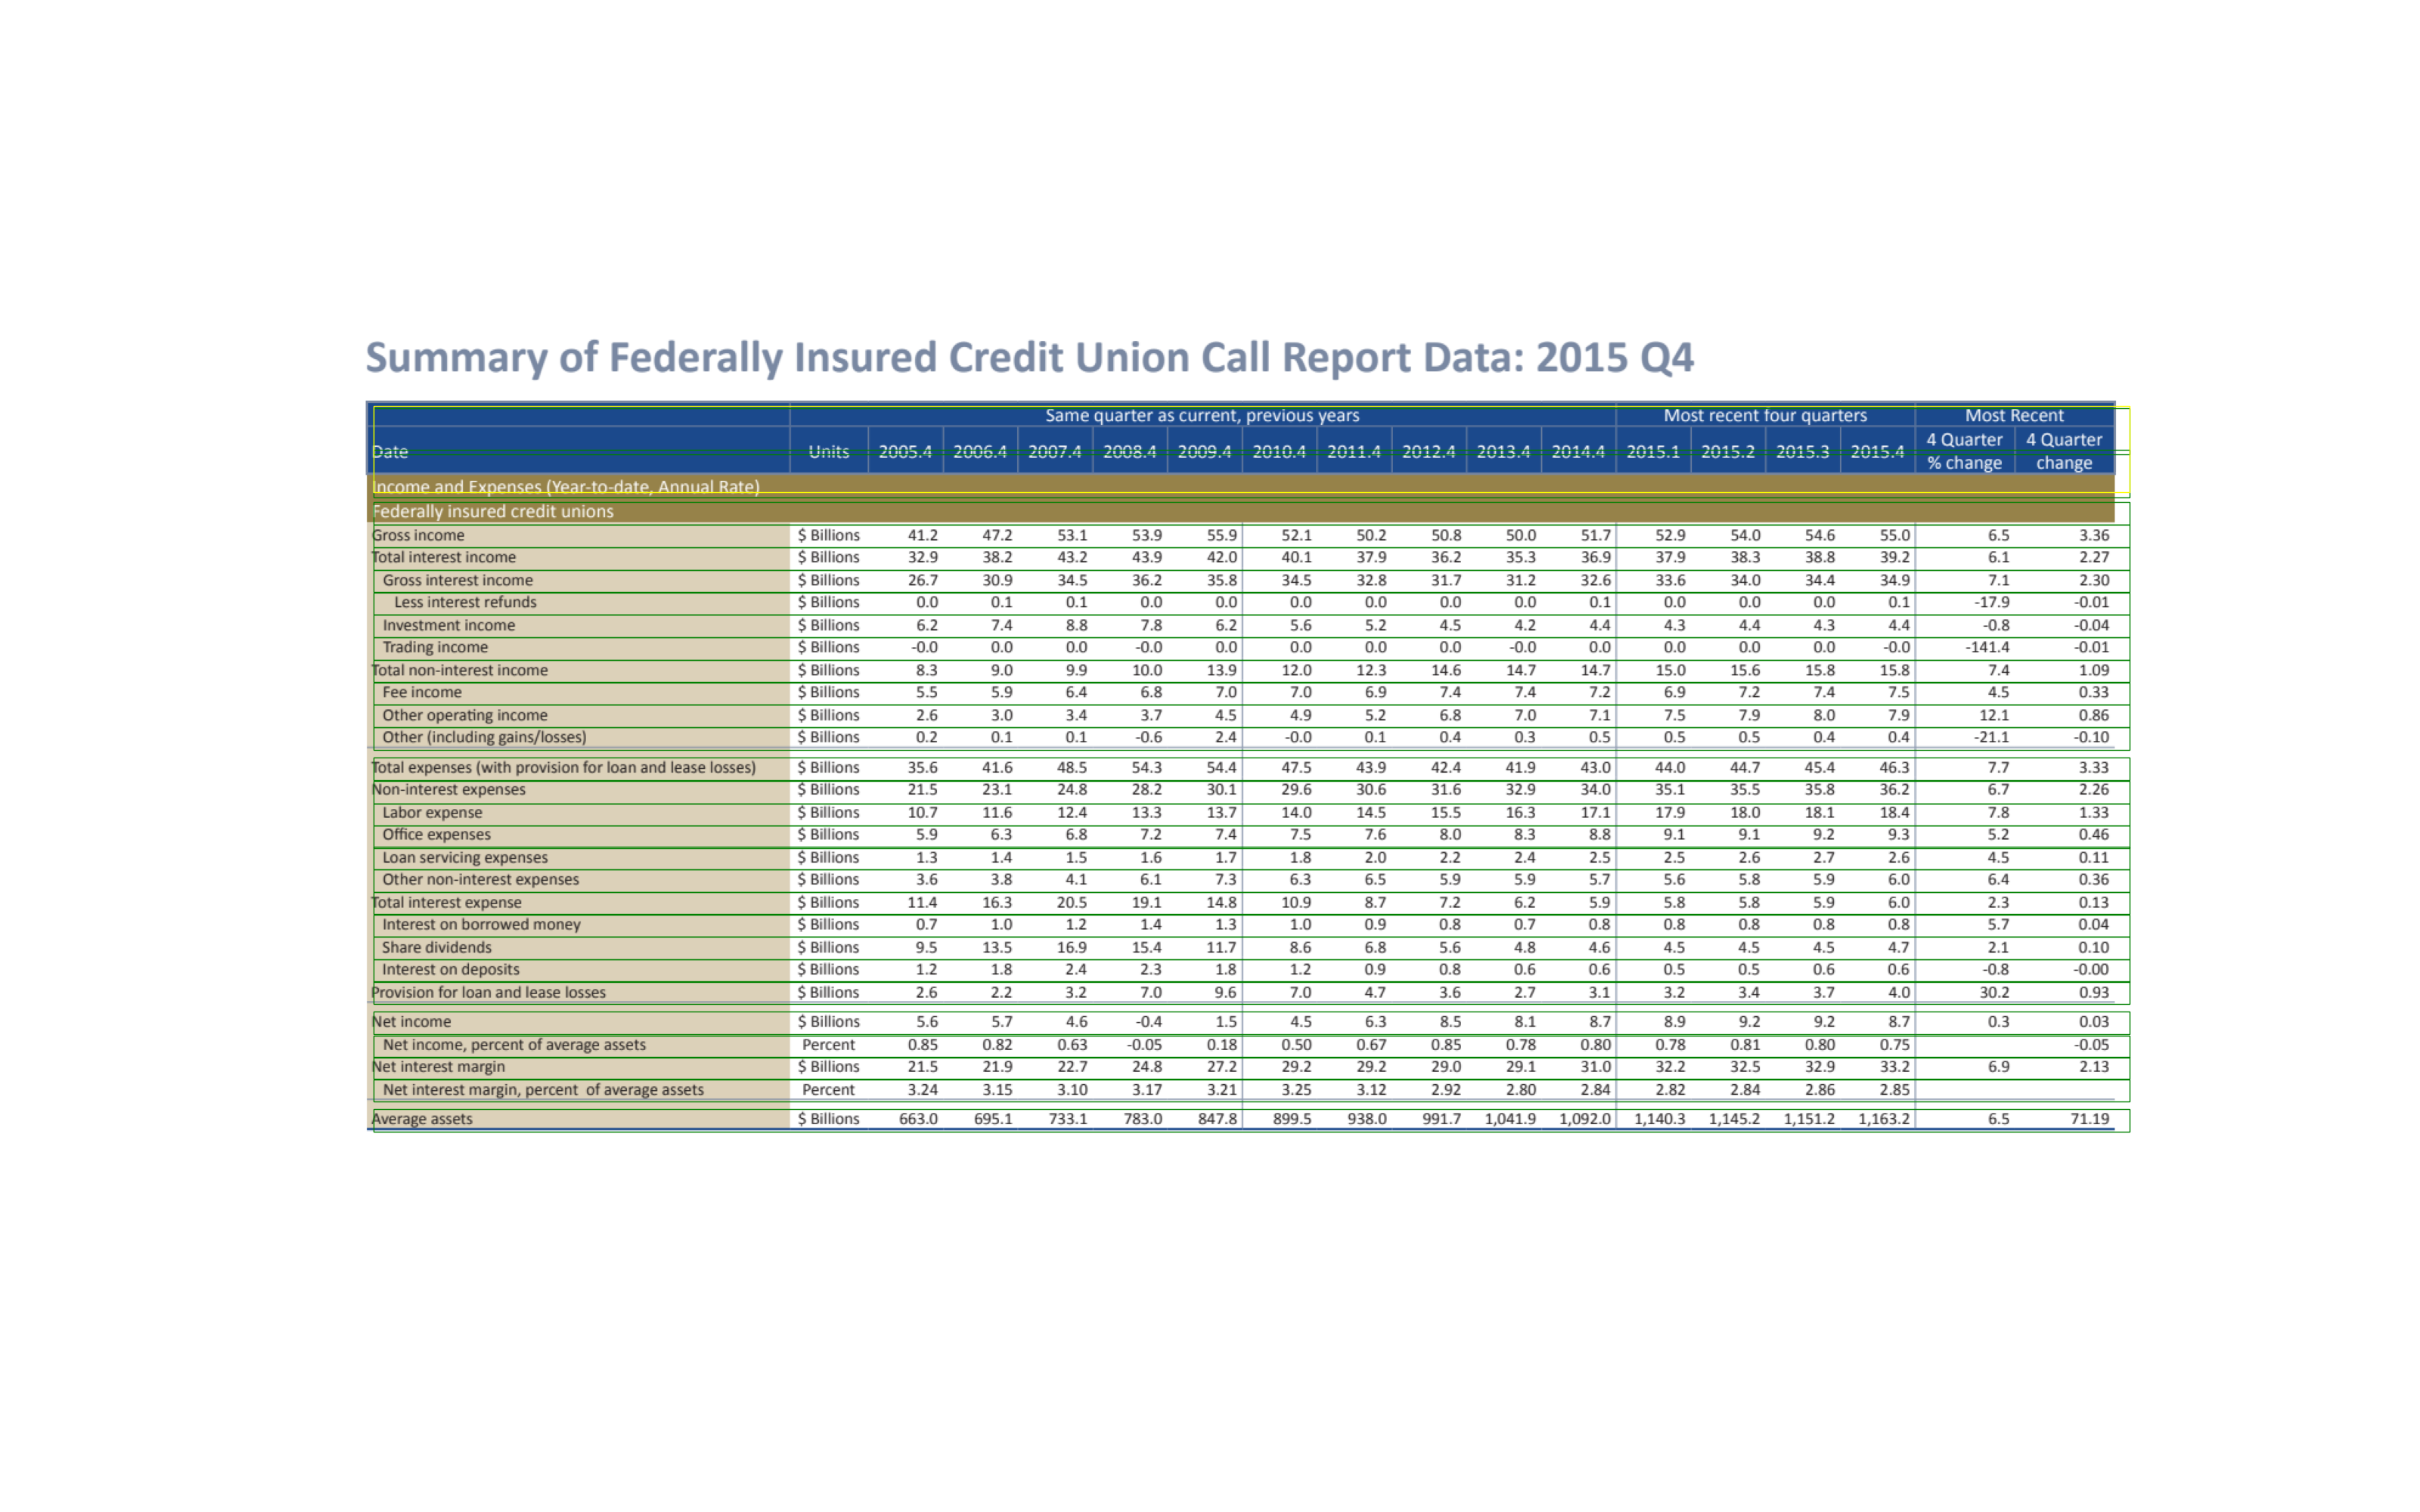

In [157]:
ft.visualize(filter=[2,3], show_labels=False, margin='auto',effective=True, linewidth=1)


In [159]:
import pandas as pd
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ft.df().fillna(""))

Header 2                                                  NaN  \
Header 1 Date Income and Expenses (Year-to-date, Annual Rate)   
0                           Federally insured credit unions     
1                                              Gross income     
2                                     Total interest income     
3                                     Gross interest income     
4                                     Less interest refunds     
5                                         Investment income     
6                                            Trading income     
7                                 Total non-interest income     
8                                                Fee income     
9                                     Other operatng income     
10                           Other (including gains/losses)     
11        Total expenses (with provision for loan and le...     
12                                    Non-interest expenses     
13                                            Labor expense     
14                                            Ofce expenses     
15                                  Loan servicing expenses     
16                              Other non-interest expenses     
17                                   Total interest expense     
18                               Interest on borrowed money     
19                                          Share dividends     
20                                     Interest on deposits     
21                      Provision for loan and lease losses     
22                                               Net income     
23                    Net income, percent of average assets     
24                                      Net interest margin     
25           Net interest margin, percent of average assets     
26                                           Average assets     

Header 2 Same quarter as current,                                    previous  \
Header 1                    Units 2005.4 2006.4 2007.4 2008.4 2009.4   2010.4   
0                                                                               
1                      $ Billions   41.2   47.2   53.1   53.9   55.9     52.1   
2                      $ Billions   32.9   38.2   43.2   43.9   42.0     40.1   
3                      $ Billions   26.7   30.9   34.5   36.2   35.8     34.5   
4                      $ Billions    0.0    0.1    0.1    0.0    0.0      0.0   
5                      $ Billions    6.2    7.4    8.8    7.8    6.2      5.6   
6                      $ Billions   -0.0    0.0    0.0   -0.0    0.0      0.0   
7                      $ Billions    8.3    9.0    9.9   10.0   13.9     12.0   
8                      $ Billions    5.5    5.9    6.4    6.8    7.0      7.0   
9                      $ Billions    2.6    3.0    3.4    3.7    4.5      4.9   
10                     $ Billions    0.2    0.1    0.1   -0.6    2.4     -0.0   
11                     $ Billions   35.6   41.6   48.5   54.3   54.4     47.5   
12                     $ Billions   21.5   23.1   24.8   28.2   30.1     29.6   
13                     $ Billions   10.7   11.6   12.4   13.3   13.7     14.0   
14                     $ Billions    5.9    6.3    6.8    7.2    7.4      7.5   
15                     $ Billions    1.3    1.4    1.5    1.6    1.7      1.8   
16                     $ Billions    3.6    3.8    4.1    6.1    7.3      6.3   
17                     $ Billions   11.4   16.3   20.5   19.1   14.8     10.9   
18                     $ Billions    0.7    1.0    1.2    1.4    1.3      1.0   
19                     $ Billions    9.5   13.5   16.9   15.4   11.7      8.6   
20                     $ Billions    1.2    1.8    2.4    2.3    1.8      1.2   
21                     $ Billions    2.6    2.2    3.2    7.0    9.6      7.0   
22                     $ Billions    5.6    5.7    4.6   -0.4    1.5      4.5   
23                        Percent   0.85   0.82   0.63  -0.05   0.18     0.50   
24      

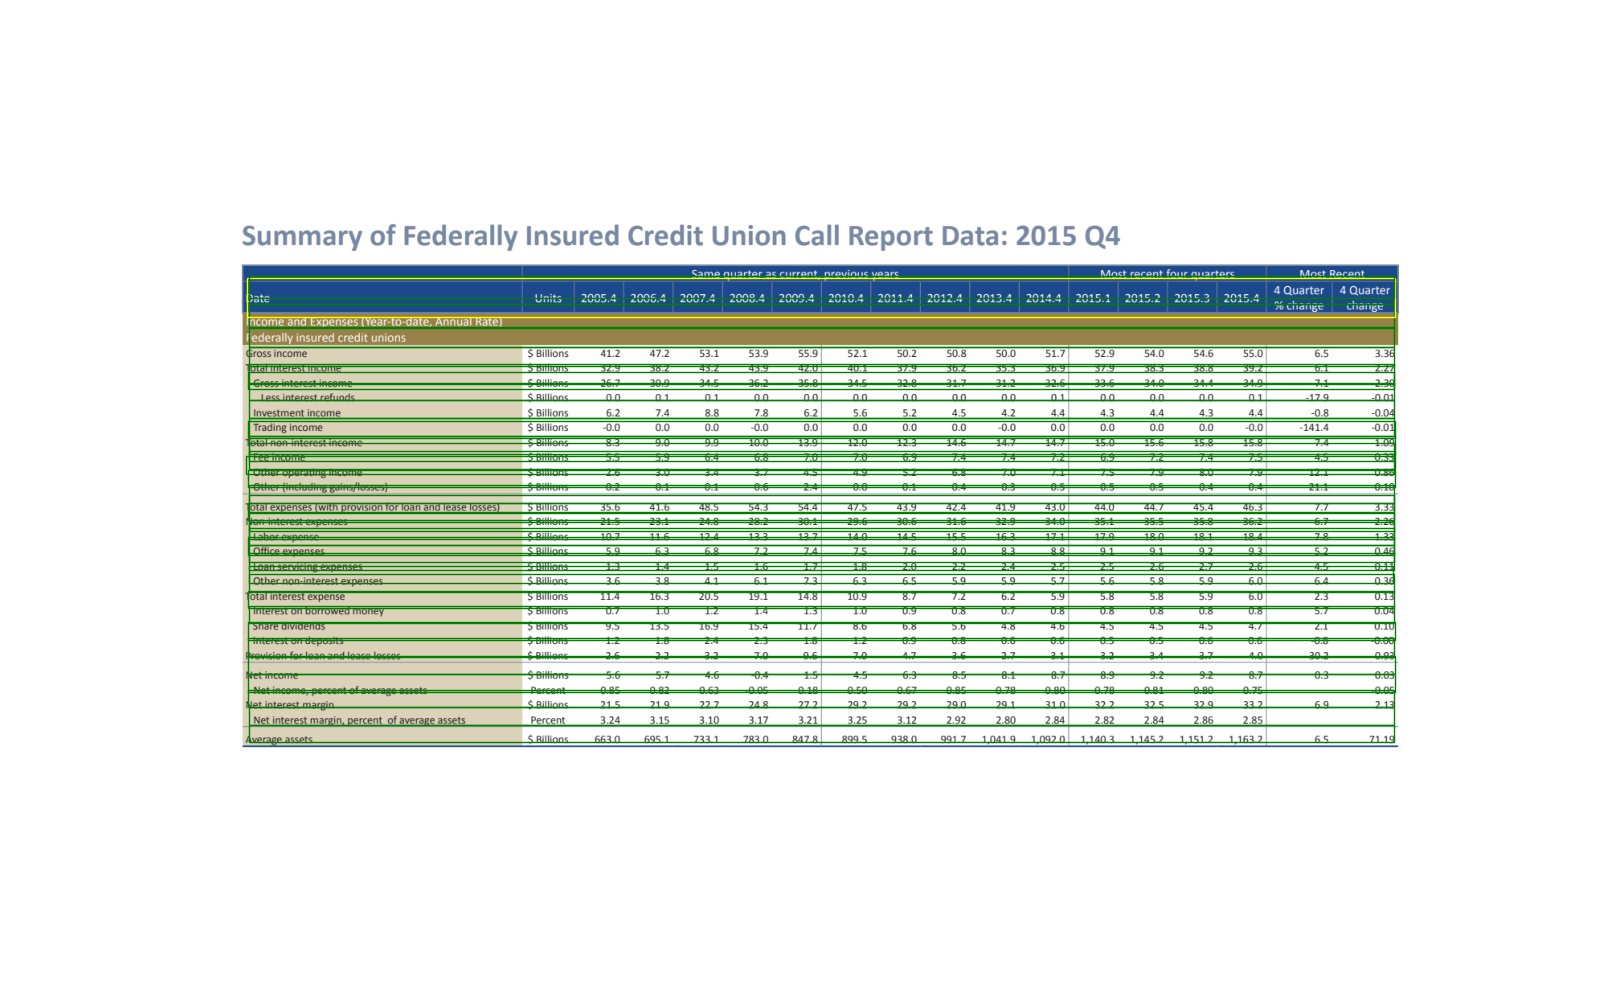

In [162]:
ft = formatter.extract(tables[0], margin='auto', padding=None)
ft.visualize(filter=[2,3], effective=False, margin='auto', figsize=(16, 10), show_labels=False, linewidth=1)

In [ ]:
df = ft.df()

In [164]:
df

,"Date \nIncome and Expenses (Year-to-date, Annual Rate)",Units,2005.4,2006.4,Same 2007.4,quarter as 2008.4,"current, 2009.4",2010.4,previous years,,...,2014.4,,2015.1,,Most recent 2015.2,four,quarters 2015.3,2015.4 4 \n%,Most Quarter 4 \nchange,Recent Quarter \nchange
0,Federally insured credit unions,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Gross income,$ Billions,41.2,47.2,53.1,53.9,55.9,None,52.1,None,...,None,51.7,None,52.9,None,54.0,54.6,55.0,6.5,3.36
2,Total interest income,$ Billions,32.9,38.2,43.2,43.9,42.0,None,40.1,None,...,None,36.9,None,37.9,None,38.3,38.8,39.2,6.1,2.27
3,Gross interest income,$ Billions,26.7,30.9,34.5,36.2,35.8,None,34.5,None,...,None,32.6,None,33.6,None,34.0,34.4,34.9,7.1,2.30
4,Less interest refunds,$ Billions,0.0,0.1,0.1,0.0,0.0,None,0.0,None,...,0.0,0.1,None,0.0,None,0.0,0.0,0.1,-17.9,-0.01
5,Investment income,$ Billions,6.2,7.4,8.8,7.8,6.2,None,5.6,None,...,4.2,4.4,None,4.3,None,4.4,4.3,4.4,-0.8,-0.04
6,Trading income,$ Billions,-0.0,0.0,0.0,-0.0,0.0,None,0.0,None,...,None,0.0,None,0.0,None,0.0,0.0,-0.0,-141.4,-0.01
7,Total non-interest income,$ Billions,8.3,9.0,9.9,10.0,13.9,None,12.0,None,...,None,14.7,None,15.0,None,15.6,15.8,15.8,7.4,1.09
8,Fee income,$ Billions,5.5,5.9,6.4,6.8,7.0,None,7.0,None,...,7.4,7.2,None,6.9,None,7.2,7.4,7.5,4.5,0.33
9,Other operatng income,$ Billions,2.6,3.0,3.4,3.7,4.5,None,4.9,None,...,7.0,7.1,None,7.5,None,7.9,8.0,7.9,12.1,0.86
